In [2]:
import numpy as np
import pandas as pd

In [8]:
def prepare_2006():
 excel_file = pd.ExcelFile('IPC _2006_f.xlsx')
 sheet_names = excel_file.sheet_names

 data=pd.read_excel('IPC _2006_f.xlsx',sheet_name=None)
 df=pd.DataFrame()
 df.head()
 for i in sheet_names:
      df_1=data[i]
      year=i[4:]
      new_col=[]
      df_1.columns = df_1.columns.str.strip().str.replace(' ', '') 
      for col in df_1.columns:
           
            if col not in ['VILLE','LIBELLE','code']:
                  new_col.append(f"{col}-{year}")
            else:
                  new_col.append(col)
      df_1.columns=new_col
 df=pd.DataFrame()
 for i in sheet_names:
    df_temp=data[i]
    df=pd.concat([df,df_temp],axis=1)
 df.head()
 month_map = {
    'janvier': '01',
    'février': '02',
    'mars': '03',
    'avril': '04',
    'mai': '05',
    'juin': '06',
    'juillet': '07',
    'août': '08',
    'septembre': '09',
    'octobre': '10',
    'novembre': '11',
    'décembre': '12'
}
 cols=[]
 for m in df.columns:
    if m not in ['VILLE','LIBELLE','code']:
          cols.append(pd.to_datetime(f"01-{month_map[m.split('-')[0]]}-{m.split('-')[1]}",dayfirst=True))
    else:
         cols.append(m)
 df.columns=cols
 df.drop(['VILLE','code'],axis=1,inplace=True)
 df = df.loc[:, ~df.columns.duplicated()]
 df=df[df['LIBELLE']=='GENERAL']
 df=df.drop('LIBELLE',axis=1)
 df=df.transpose()
 df=df.reset_index()
 df.columns=['Date','IPC']
 return df


In [9]:
df_2006=prepare_2006()
df_2006

,Date,IPC
0,2007-01-01,101.5
1,2007-02-01,101.2
2,2007-03-01,101.6
3,2007-04-01,102.6
4,2007-05-01,101.4
...,...,...
127,2017-08-01,117.7
128,2017-09-01,118.7
129,2017-10-01,118.6
130,2017-11-01,119.1


In [10]:
def preparing_df(df):
  def verify_date(col):
    try:
        pd.to_datetime(col,format="%Y-%m-%d %H:%M:%S")
        return True
    except:
        return False
  city_map={
    1:'Agadir',
    2:'Casablanca',
    3:'Fes',
    4:'Kenitra',
    5:'Marrackech',
    6:'Oujda',
    7:'Rabat',
    8:'Tetouan',
    9:'Meknes',
    10:'Tanger',
    11:'Laayoune',
    12:'Dakhla',
    13:'Guelmim',
    14:'Settat',
    15:'Safi',
    16:'Beni Mellal',
    17:'Al-Houcima',
    18:'Errachidia',
    99:"National"
}
  date_cols=[col for col in df.columns  if verify_date(col)]
  df=df.melt(id_vars=["VILLE","coicop","libelle"],var_name="Date",value_vars=date_cols,value_name="IPC")
  df["VILLE"]=df["VILLE"].map(city_map)
  df["Date"]=pd.to_datetime(df["Date"],errors="coerce").astype(str)
  df=df[(df['VILLE']=="National")&(df['libelle']=='GENERAL')]
  df=df.drop(['VILLE','coicop','libelle'],axis=1)
  return df


In [162]:
df_2017=pd.read_excel('IPC.xlsx')
df_2017=preparing_df(df_2017)

In [123]:
df_2017.head()

,Date,IPC
2596,2017-01-01,99.4
5340,2017-02-01,99.5
8084,2017-03-01,99.3
10828,2017-04-01,99.3
13572,2017-05-01,99.7


In [7]:
def chainage():
    df_2006=prepare_2006()
    df_2017=pd.read_excel('IPC.xlsx')
    df_2017=preparing_df(df_2017)
    IPC_2017=df_2017[df_2017['Date']=='2017-12-01']['IPC'].values[0]
    IPC_2006=df_2006[df_2006['Date']=='2017-12-01']['IPC'].values[0]
    variation=(IPC_2017)/IPC_2006
    df_2006["IPC"]=round(df_2006["IPC"]*variation,1)
    df_2006=df_2006[df_2006['Date'] < '2017-01-01']
    df_finaly=pd.concat([df_2006,df_2017],ignore_index=True)
    df_finaly['Date']=pd.to_datetime(df_finaly['Date'])
    df_finaly=df_finaly.set_index('Date')
    return df_finaly

In [11]:
df_finaly=chainage()
df_finaly.head()

,IPC
Date,
2007-01-01,85.8
2007-02-01,85.6
2007-03-01,85.9
2007-04-01,86.7
2007-05-01,85.7


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox,het_arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
plt.style.use("seaborn-v0_8")

In [ ]:
#ARIMA forecasting :
#1.modele il est additif ou multiplicatif?
#2.stationarite?modele est il stationanire ?test AD fuller
#3.premiere difference ->check residuals leurs distributuions
#4.np.log() si les valeurs sont exponentiels
#5.stationariser->modeliser
#6.choisir le bon modele on verifie ACF /PACF
#7 choisis le modele on lui donne un ordre et on verifie plusieurs tests
#8 residus sont ils des bruits blanc?suivent il la loi normale?leur variance est-elle constante?
#9.critere dinformation AIC et BIC doivent etre minimiser
#10.prediction model.forecast...


# visualisation 

<Axes: xlabel='Date', ylabel='IPC'>

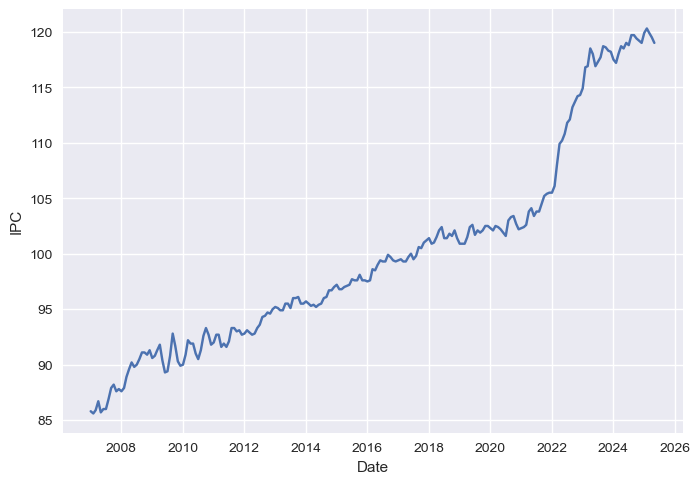

In [107]:
sns.lineplot(x='Date',y='IPC',data=df_finaly)

# stationarite

In [126]:
def check_stationarity(df):
    result=adfuller(df)
    print("t-stat:",result[0])
    print("p-value:",result[1])
    if result[1]>=0.05:
        print("on accepte Ho :la serie n'est pas stationnaire")
    else:
        print("on rejette Ho:La série est stationnaire")
    


In [127]:
check_stationarity(df_finaly)

t-stat: 0.18047301711864133
p-value: 0.971144871517144
on accepte Ho :la serie n'est pas stationnaire


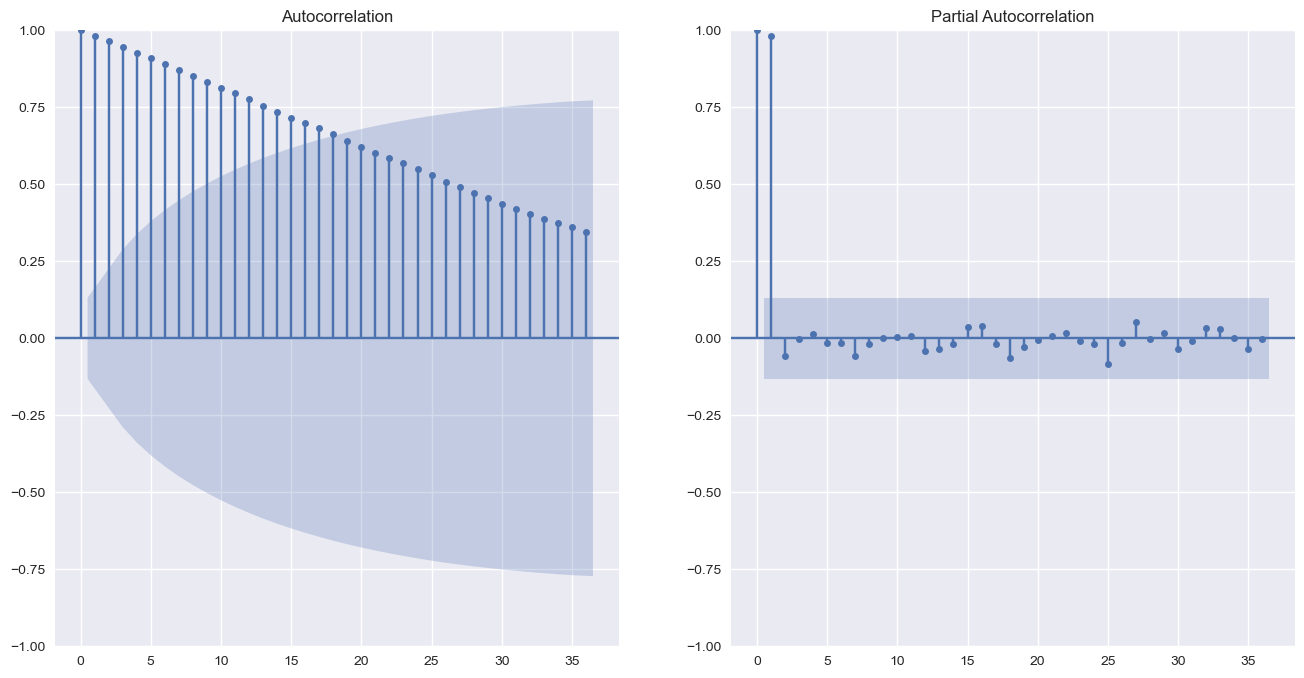

In [128]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
plot_acf(df_finaly,lags=36,ax=ax1)
plot_pacf(df_finaly,lags=36,ax=ax2)
plt.show()

# 1 ere difference

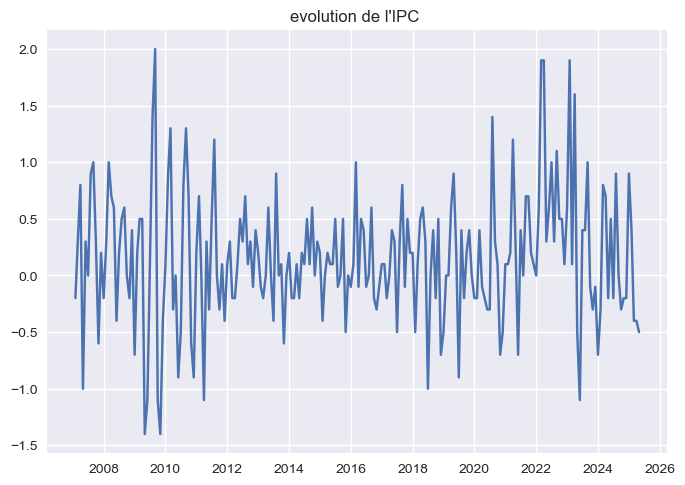

In [129]:
df_diff=df_finaly.diff().dropna()
plt.plot(df_diff)
plt.title("evolution de l'IPC ")
plt.show()

In [130]:
check_stationarity(df_diff)

t-stat: -2.790756818828271
p-value: 0.059606269052343716
on accepte Ho :la serie n'est pas stationnaire


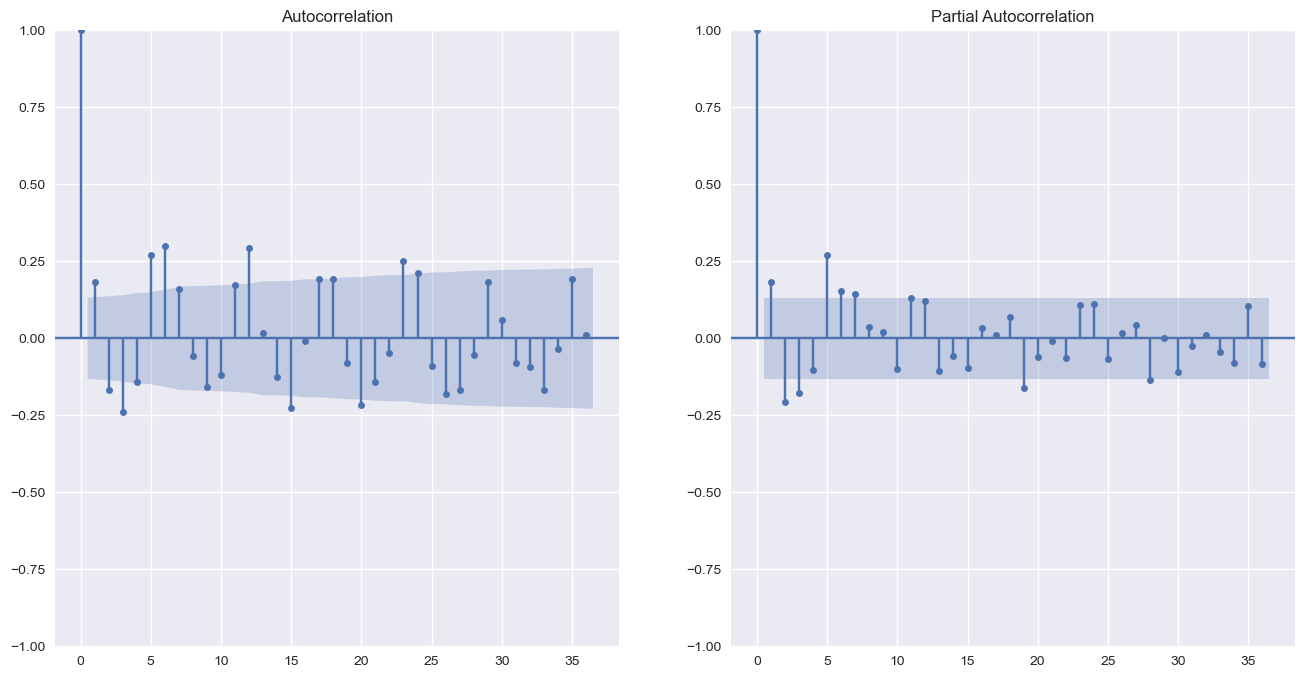

In [131]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
plot_acf(df_diff,lags=36,ax=ax1)
plot_pacf(df_diff,lags=36,ax=ax2)
plt.show()

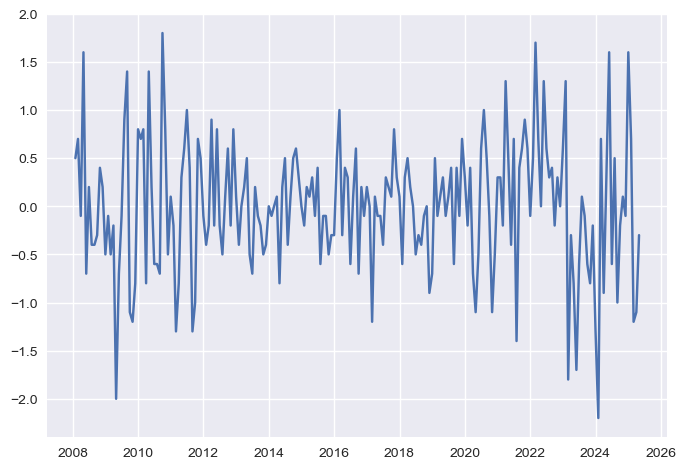

In [132]:
df_diff_12=df_diff.diff(12).dropna()
plt.plot(df_diff_12)
plt.show()

In [133]:
check_stationarity(df_diff_12)

t-stat: -5.2108751254926355
p-value: 8.353562032376955e-06
on rejette Ho:La série est stationnaire


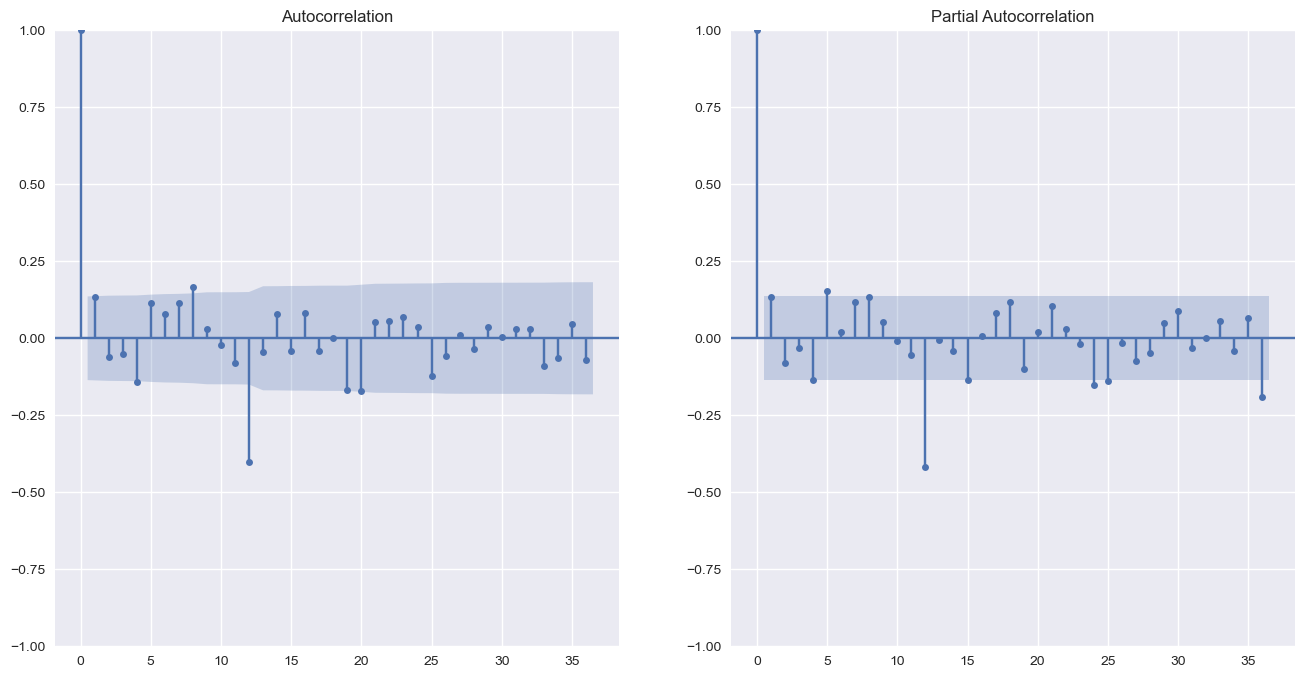

In [134]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
plot_acf(df_diff_12,lags=36,ax=ax1)
plot_pacf(df_diff_12,lags=36,ax=ax2)
plt.show()

# test split test

In [180]:
def model_ARIMA(df_finaly):
    train=df_finaly[:'2024-05-01']
    test=df_finaly['2024-05-01':]
    model=SARIMAX(train,order=(1,1,0),seasonal_order=(1,1,1,12))
    model_fit=model.fit()
    model_fit.save('ARIMA_model.pkl')
    return test

In [183]:
df_finaly=chainage()
print(df_finaly)

              IPC
Date             
2007-01-01   85.8
2007-02-01   85.6
2007-03-01   85.9
2007-04-01   86.7
2007-05-01   85.7
...           ...
2025-01-01  119.9
2025-02-01  120.3
2025-03-01  119.9
2025-04-01  119.5
2025-05-01  119.0

[221 rows x 1 columns]


In [ ]:

test=model_ARIMA(df_finaly)
model = SARIMAXResults.load("ARIMA_model.pkl")
final_forecast=model.forecast(steps=len(test))
print(final_forecast)

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38554D-01    |proj g|=  3.18448D-01

At iterate    5    f=  8.14928D-01    |proj g|=  4.59503D-02

At iterate   10    f=  7.90950D-01    |proj g|=  1.29804D-02

At iterate   15    f=  7.88596D-01    |proj g|=  4.41487D-03

At iterate   20    f=  7.88274D-01    |proj g|=  5.02764D-03

At iterate   25    f=  7.88238D-01    |proj g|=  5.89895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   

In [135]:
train=df_finaly.loc[:'2024-05-01']
test=df_finaly.loc['2024-05-01':]
print("train size:",len(train))
print("test size:",len(test))
print("nombre d'observation:",len(df_finaly))
print("glimpse of test",test[:5])


train size: 209
test size: 13
nombre d'observation: 221
glimpse of test               IPC
Date             
2024-05-01  118.5
2024-06-01  119.0
2024-07-01  118.8
2024-08-01  119.7
2024-09-01  119.7


In [186]:
def chainage():
    df_2006=prepare_2006()
    df_2017=pd.read_excel('IPC.xlsx')
    df_2017=preparing_df(df_2017)
    IPC_2017=df_2017[df_2017['Date']=='2017-12-01']['IPC'].values[0]
    IPC_2006=df_2006[df_2006['Date']=='2017-12-01']['IPC'].values[0]
    variation=(IPC_2017)/IPC_2006
    df_2006["IPC"]=round(df_2006["IPC"]*variation,1)
    df_2006=df_2006[df_2006['Date'] < '2017-01-01']
    df_finaly=pd.concat([df_2006,df_2017],ignore_index=True)
    df_finaly['Date']=pd.to_datetime(df_finaly['Date'])
    df_finaly=df_finaly.set_index('Date')
    return df_finaly


In [187]:
df_a=chainage()
df_a

,IPC
Date,
2007-01-01,85.8
2007-02-01,85.6
2007-03-01,85.9
2007-04-01,86.7
2007-05-01,85.7
...,...
2025-01-01,119.9
2025-02-01,120.3
2025-03-01,119.9


In [150]:
model=SARIMAX(train,order=(1,1,0),seasonal_order=(1,1,1,12))
model_fit=model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38554D-01    |proj g|=  3.18448D-01

At iterate    5    f=  8.14928D-01    |proj g|=  4.59503D-02

At iterate   10    f=  7.90950D-01    |proj g|=  1.29804D-02

At iterate   15    f=  7.88596D-01    |proj g|=  4.41487D-03

At iterate   20    f=  7.88274D-01    |proj g|=  5.02764D-03

At iterate   25    f=  7.88238D-01    |proj g|=  5.89895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   

 This problem is unconstrained.


                                      SARIMAX Results                                       
Dep. Variable:                                  IPC   No. Observations:                  209
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -164.741
Date:                              Sat, 26 Jul 2025   AIC                            337.482
Time:                                      11:31:19   BIC                            350.595
Sample:                                  01-01-2007   HQIC                           342.791
                                       - 05-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1320      0.062      2.125      0.034       0.010       0.254
ar.S.L12       0.28

In [151]:
final_forecast=model_fit.forecast(steps=len(test))
final_forecast 

2024-06-01    118.088368
2024-07-01    118.197852
2024-08-01    118.718411
2024-09-01    119.427642
2024-10-01    119.483454
2024-11-01    119.259663
2024-12-01    119.176120
2025-01-01    118.945386
2025-02-01    118.979585
2025-03-01    119.481679
2025-04-01    119.969597
2025-05-01    119.941201
2025-06-01    119.735054
Freq: MS, Name: predicted_mean, dtype: float64

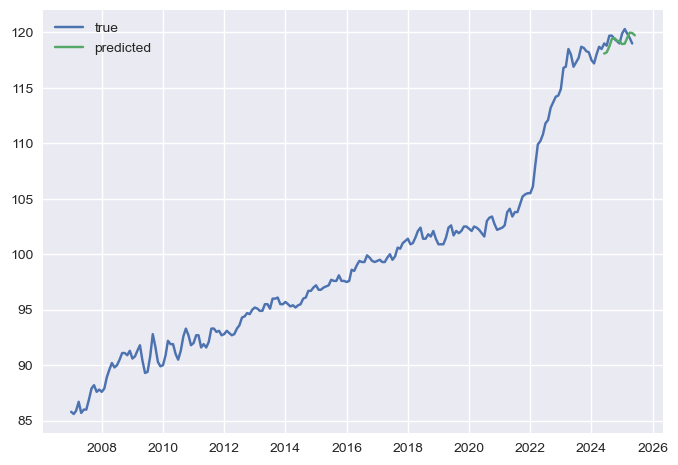

In [152]:

plt.plot(df_finaly,label="true")
plt.plot(final_forecast,label="predicted")
plt.legend()
plt.show()

In [143]:
AIC=model_fit.aic
BIC=model_fit.bic
print(f"AIC:{AIC:.3f},BIC={BIC:.3f}")
y_pred=final_forecast.values
y=test.values
MSE=mse(y_pred,y)
print(f"mse:{MSE:.3f}")
RMSE=np.sqrt(MSE)
print(f"RMSE:{RMSE:.3f}")
MAPE=np.mean((np.abs(y-y_pred))/y)*100
print(f"MAPE:{MAPE:.3f}")

AIC:355.054,BIC=368.167
mse:2.164
RMSE:1.471
MAPE:1.160


In [144]:
model_sarima=SARIMAX(train,order=(2,1,1),seasonal_order=(2,1,0,12))
model_fit_2=model_sarima.fit()
print(model_fit_2.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39881D-01    |proj g|=  2.83820D-01

At iterate    5    f=  8.28524D-01    |proj g|=  7.84678D-03

At iterate   10    f=  8.28346D-01    |proj g|=  1.15647D-02

At iterate   15    f=  8.27953D-01    |proj g|=  8.16248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   1.141D-05   8.280D-01
  F =  0.82795285359342308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [145]:
AIC=model_fit_2.aic
BIC=model_fit_2.bic
print(f"AIC:{AIC:.3f},BIC={BIC:.3f}")

AIC:358.084,BIC=377.753


In [146]:
forecast_2=model_fit_2.forecast(steps=len(test))

In [147]:
y_pred=forecast_2.values
y=test.values
MSE=mse(y_pred,y)
print(f"mse:{MSE:.3f}")
RMSE=np.sqrt(MSE)
print(f"RMSE:{RMSE:.3f}")
MAPE=np.mean((np.abs(y-y_pred))/y)*100
print(f"MAPE:{MAPE:.3f}")

mse:2.444
RMSE:1.563
MAPE:1.220


In [148]:
#forecast the next 12 months:with the first model:
forecasts=model_fit.forecast(steps=len(test)+12)


In [104]:
forecasts

2024-06-01    118.099217
2024-07-01    118.213684
2024-08-01    118.738366
2024-09-01    119.442540
2024-10-01    119.500081
2024-11-01    119.278034
2024-12-01    119.196837
2025-01-01    118.974300
2025-02-01    119.013614
2025-03-01    119.511259
2025-04-01    119.995349
2025-05-01    119.970160
2025-06-01    119.770327
2025-07-01    119.799824
2025-08-01    120.356333
2025-09-01    120.980439
2025-10-01    121.081085
2025-11-01    120.880239
2025-12-01    120.804132
2026-01-01    120.711455
2026-02-01    120.843060
2026-03-01    121.258469
2026-04-01    121.683834
2026-05-01    121.706191
2026-06-01    121.561014
Freq: MS, Name: predicted_mean, dtype: float64

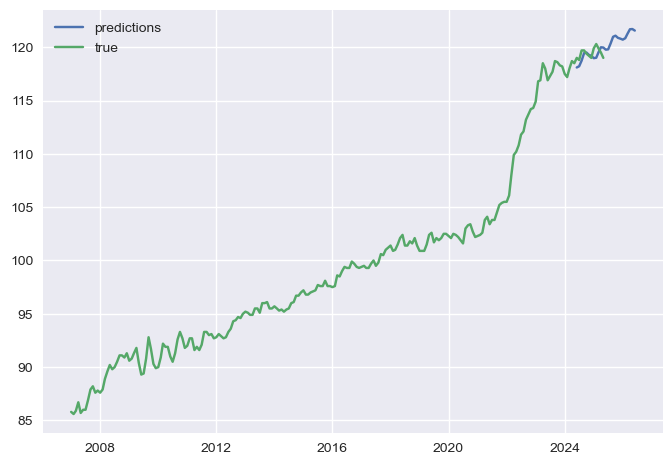

In [105]:
plt.plot(forecasts,label="predictions")
plt.plot(df_finaly,label="true")
plt.legend()

In [ ]:
#LSTM forecsting:
#creer des sequences de temps (univariate on utilise time series generator)
#puis on la passe au model de keras sequential on train sur plusieurs epochs


In [13]:
df_prophet=df_finaly.reset_index()
df_prophet=df_prophet.rename(columns={'Date':'ds','IPC':'y'})
df_prophet.head()

,ds,y
0,2007-01-01,85.8
1,2007-02-01,85.6
2,2007-03-01,85.9
3,2007-04-01,86.7
4,2007-05-01,85.7


In [17]:
from prophet import Prophet
m=Prophet(yearly_seasonality=True)
m.fit(df_prophet)


10:56:28 - cmdstanpy - INFO - Chain [1] start processing
10:56:32 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
581,2026-04-27
582,2026-04-28
583,2026-04-29
584,2026-04-30
585,2026-05-01


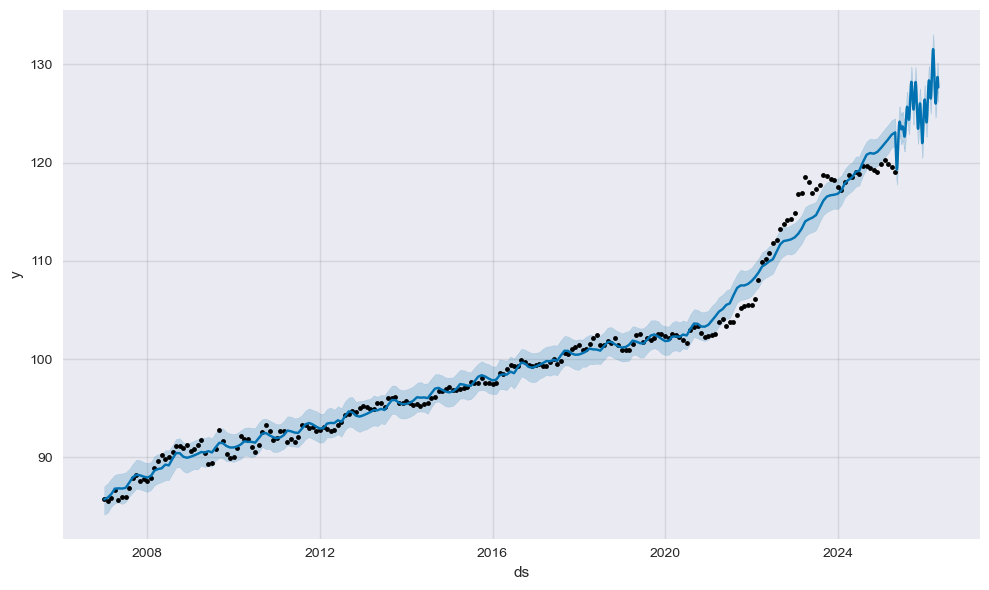

In [20]:
forecast=m.predict(future)
fig1 = m.plot(forecast)

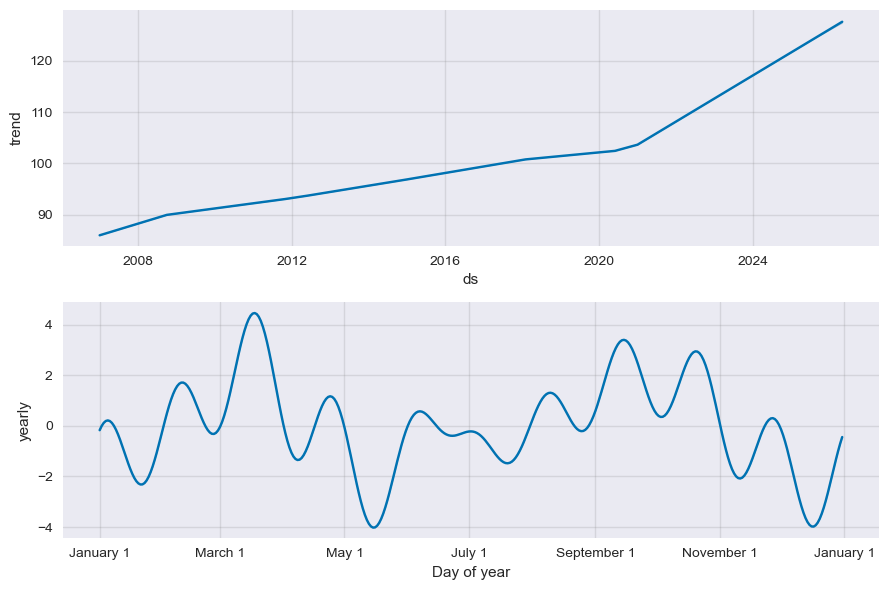

In [21]:
fig2 = m.plot_components(forecast)

In [22]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

[[<matplotlib.lines.Line2D at 0x15a2f3650>],

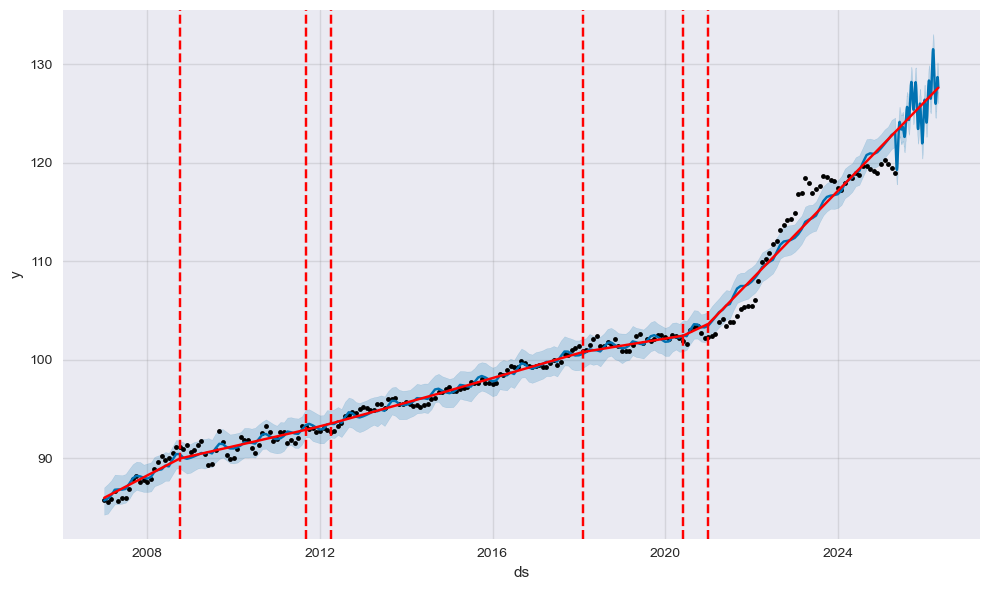

In [23]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(m.predict(forecast))
add_changepoints_to_plot(fig.gca(), m, m.predict(forecast))

In [24]:
train_holt_winter=df_finaly[:'2024-05-01']
test_holt_winter=df_finaly['2024-05-01':]

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_holt_winter=ExponentialSmoothing(train_holt_winter,seasonal_periods=12,trend="mul",seasonal="add").fit(optimized=True)


/opt/anaconda3/envs/datas/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



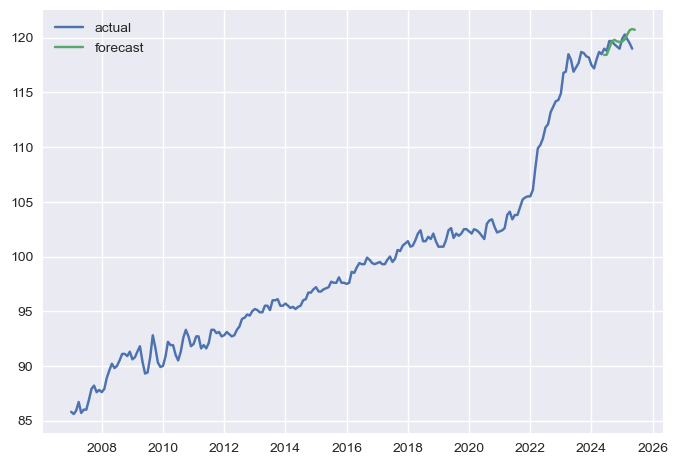

In [26]:
forecast_holt_winter=model_holt_winter.forecast(len(test_holt_winter))
plt.plot(df_finaly,label="actual")
plt.plot(forecast_holt_winter,label="forecast")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
MSE=mse(test_holt_winter,forecast_holt_winter)
print(f"MSE={MSE:.3f}")
RMSE=np.sqrt(MSE)
print(f"RMSE={RMSE:.3f}")

MSE=0.489
RMSE=0.699


In [29]:
future_holt_winter=model_holt_winter.forecast(len(test_holt_winter)+12)

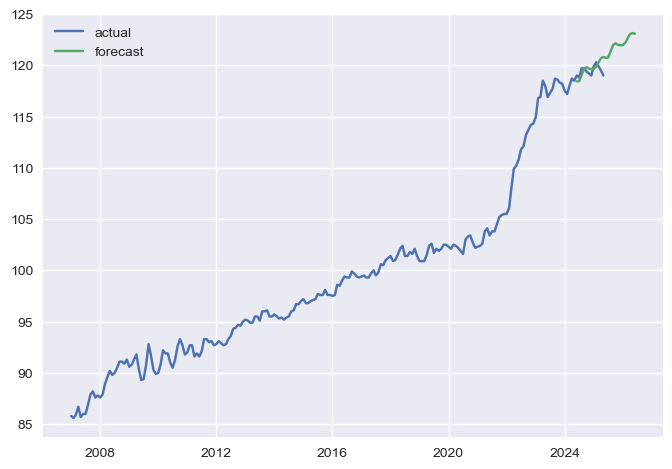

In [30]:
plt.plot(df_finaly,label="actual")
plt.plot(future_holt_winter,label="forecast")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#prophet 
#dates need to be renamed ds 
#values y